In [470]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd

## Interesting things
The productivity (precentage of eggs laid) on death percentage can be divided in two/three (it depends from your choice) clusters: the first one has an high productivity and a low death rate; the second one has a medium productivity and a higher death rate; the third one has a really bad productivity and a high death rate. It is interesting that this third cluster is found just in the cycle C while the others two clusters can be appended to almost every cycle. So every cycle starts with the first cluster and ends with the second one.

## Data loading

In [471]:
cycles = []

cycleX1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycleX1 = cycleX1.drop(columns=["Feed","Water"])
cycles.append(cycleX1)

cycleX2 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_2-Clean.csv")
cycleX2 = cycleX2.drop(columns=["Feed","Water"])
cycles.append(cycleX2)

cycleY = pd.read_csv("../Data/Chickens data/WithMacro/CycleY-Clean.csv")
cycleY = cycleY.drop(columns=["Feed","Water"])
cycles.append(cycleY)

cycleZ = pd.read_csv("../Data/Chickens data/WithMacro/CycleZ-Clean.csv")
cycleZ = cycleZ.drop(columns=["Feed","Water"])
cycles.append(cycleZ)

cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
cycleA = cycleA.drop(columns=["Feed","Water"])
cycles.append(cycleA)

cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")
cycleB = cycleB.drop(columns=["Feed","Water"])
cycles.append(cycleB)

# cycle = pd.concat(cycles, axis=0, ignore_index=True)
# cycle

## Parameters

In [472]:
variables_to_cluster = ["Laied", "DeathPerc"]
variable_to_plot_1 = 'DeathPerc'
variable_to_plot_2 = 'Laied'
variable_to_plot_3 = 'AvgTemp'

## Plotting function

In [473]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.dates as mdates
# import matplotlib.ticker as mticker
# import matplotlib as mpl

def addPriceToCycle(dataSets):
    '''
    Function add to each cycle the price of eggs in that period of time.
    '''
    eggs_price_bio = pd.read_csv("..\Data\EggsData\price_bio.csv", sep=",")
    eggs_price_non_bio = pd.read_csv("..\Data\EggsData\price_non_bio.csv", sep=",")

    eggs_price = pd.concat([eggs_price_bio, eggs_price_non_bio])

    eggs_price['Date'] = pd.to_datetime(eggs_price[['Month', 'Day', 'Year']])
    eggs_price.pop('Year')
    eggs_price.pop('Day')
    eggs_price.pop('Month')
    
    newDataSets = []
    
    for dataSet in dataSets:
        dataSet['Date of Laid'] = pd.to_datetime(dataSet['Date of Laid'])
        dataSet = pd.merge(dataSet, eggs_price, left_on='Date of Laid', right_on='Date', how='left')
        dataSet['Price'] = dataSet['Price'].fillna(method='ffill')
        dataSet['Price'] = dataSet['Price'].fillna(method='bfill')
        dataSet['Earnings'] = dataSet['Price']*(dataSet['Eggs']/100)
        dataSet.pop('Date')
        newDataSets.append(dataSet)
    
    return newDataSets


def compareDifferentCycles(dataSets, attribute):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    #Select to plot just years
    # ax.xaxis.set_major_locator(mpl.dates.DayLocator((1, 15)))
    # ax.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
    # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%d"))
    # ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
    fig.set_figwidth(20)
    
    legend = ['X1', 'X2', 'Y', 'Z', 'A', 'B']
    
    # apply min-max normalization
    # scaler = MinMaxScaler()
    # dataSets = pd.DataFrame(scaler.fit_transform(dataSets.values), columns=dataSets.columns, index=dataSets.index)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        dataSet = dataSet.drop(columns=["Arrival Chickens Date","Date of Selling","Date of Laid"])
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 30
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

In [474]:
cycles = addPriceToCycle(cycles)

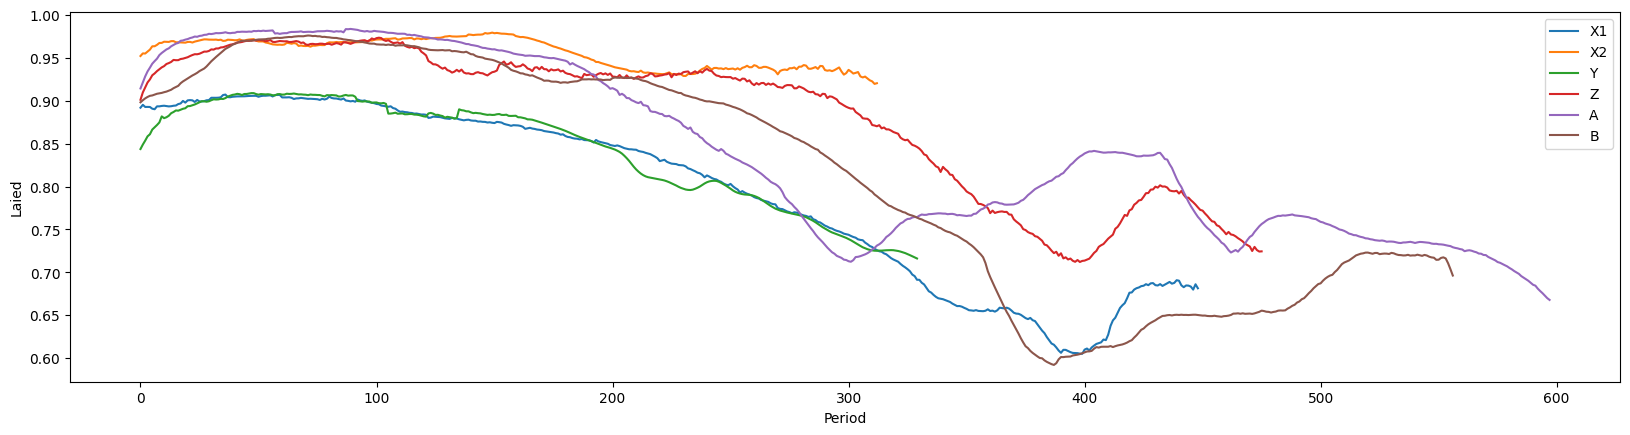

In [475]:
compareDifferentCycles(cycles, 'Laied')

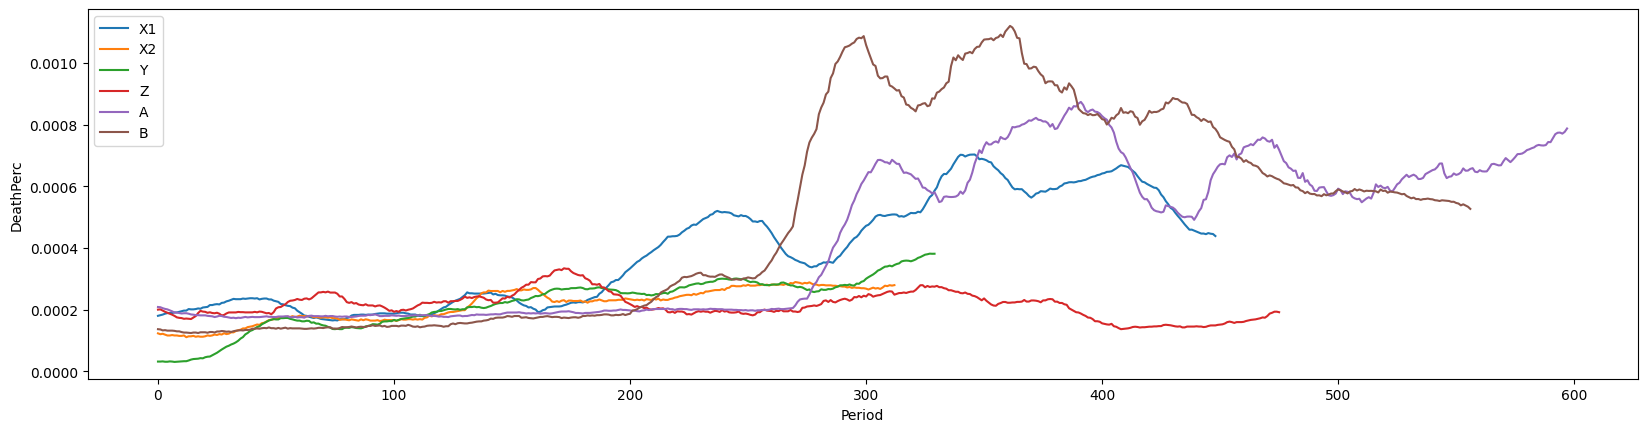

In [476]:
compareDifferentCycles(cycles, 'DeathPerc')

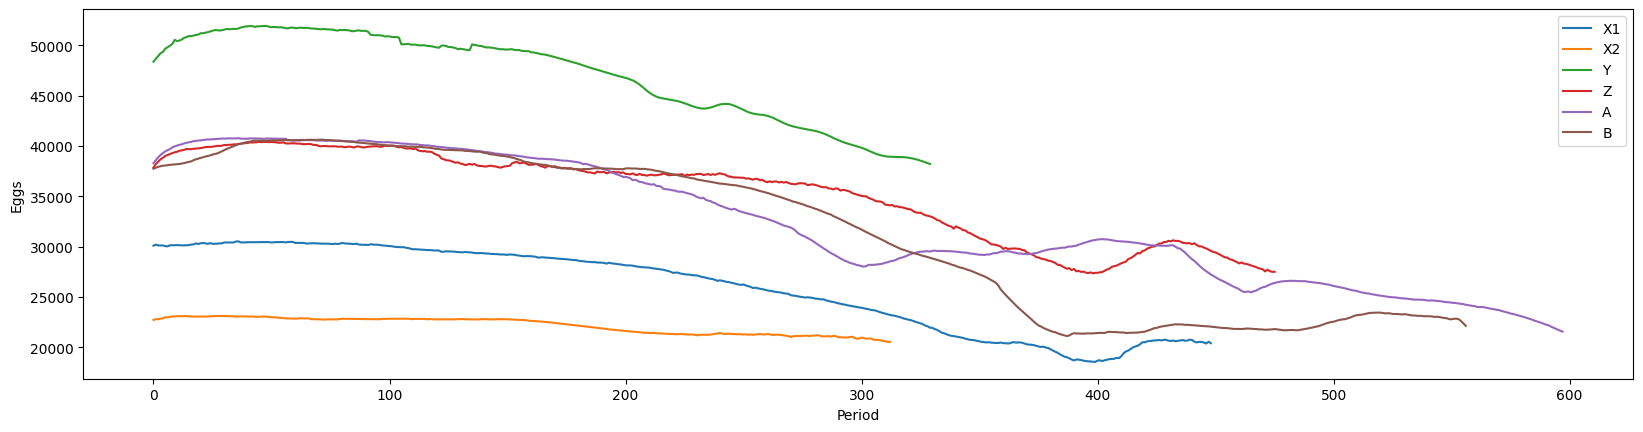

In [477]:
compareDifferentCycles(cycles, 'Eggs')

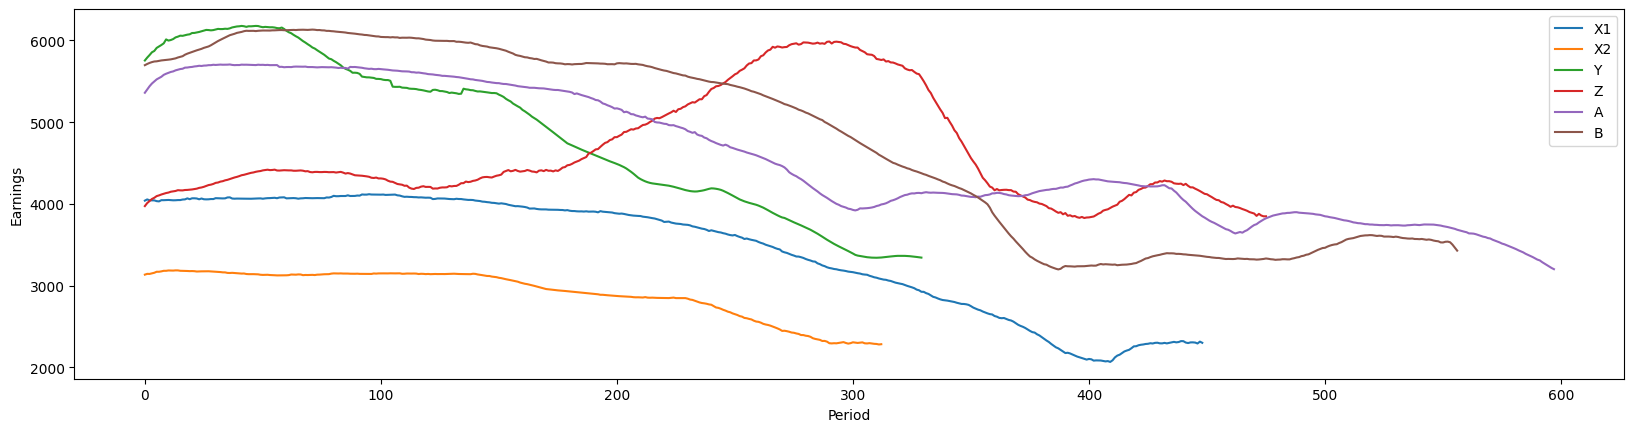

In [478]:
compareDifferentCycles(cycles, 'Earnings')